In [1]:
import numpy as np

En esta sesión veremos algunos ejemplos clásicos donde las recursiones juegan un papel muy importante.

# Sucesión de Fibonacci

Es de las mas famosas dentro de las sucesiones definidas recursivamente. Los términos de la sucesión se definen por:

\begin{align}
F_0 = 0,\ F_1 = 1\\
F_n = F_{n-1} + F_{n-2}
\end{align}

Veamos algunos ejemplos relacionados con esta sucesión.

## Ejemplo 1

**Muestra que cualesquiera dos números consecutivos en la sucesión de Fibonacci son primos relativos.**

---

Probaremos por inducción que para todo entero positivo $n$, se cumple:

$$(F_n, F_{n-1}) = 1$$

donde $(x,y)$ es el máximo común divisor de $x$ y $y$.

**Demostración:**

* Caso base: Claramente:

$$(0, 1) = 1$$

* Hipótesis de inducción: 

$$(F_k, F_{k-1}) = 1$$

* Paso inductivo: Usando que $(a,b) = (a-b, b)$ Notemos que 

\begin{align}
(F_{k+1}, F_k) &= (F_{k+1} - F_k, F_k) \\
&= (F_{k-1}, F_k) \\
&= 1
\end{align}
Lo último por nuestra hipótesis de inducción. 

Concluimos que en efecto, $(F_n, F_{n-1}) = 1$ para todo entero positivo $n$.

## Ejemplo 2 

**Encuentra el residuo de $F_{100005}$ al ser dividido entre $23$.**

---

Como cada término depende únicamente de los dos anteriores, al considerar la sucesión dada por los residuos de la de Fibonacci, hay $23 \cdot 23$ parejas posibles de residuos módulo $23$. Por lo tanto, la sucesión de los residuos se va a ciclar a partir de cierto momento (queda como ejercicio probar que esta sucesión se cicla desde el principio). 

Encontrar la longitud del periodo de esta secuencia nos será útil para resolver este problema, pues si el periodo es $p$ únicamente restaría encontrar el residuo de $100005$ módulo $p$.

Encontremos entonces el periodo de la sucesión de los residuos módulo $23$.

In [187]:
res = [0, 1]
cur = (1, 1)

while cur != (1,0):
    res.append(cur[1])
    cur = (cur[1], (cur[0] + cur[1])%5)

len(res)

20

In [188]:
19 % 20

19

1

Ahora solo resta encontrar el residuo de $100005$ módulo $48$, y tomar el respectivo residuo de la sucesión. 

In [3]:
print("El residuo del 100005-ésimo número de Fibonacci módulo 23 es:", res[100005 % 48])

El residuo del 100005-ésimo número de Fibonacci módulo 23 es: 21


# Torres de Hanoi

Consideremos el problema de las torres de Hanoi con $n$ discos:

Se tienen $n$ discos de distintos tamaños y tres postes verticales donde se pueden poner estos discos. Inicialmente, se tienen todos los discos en el primer poste ordenados del más chico al más grande, con el más grande en la base. En cada paso se puede mover un disco que se encuentre hasta arriba de algún poste a cualquier otro poste siempre y cuando se coloque en un poste vacío o sobre un disco de mayor tamaño. Determina la menor cantidad de pasos necesarios para mover todos los discos del primer poste al tercero.

Veamos qué pasa cuando $n$ es chico. 

Se puede jugar en https://www.mathsisfun.com/games/towerofhanoi.html

* Si $n = 1$ es evidente que en un movimiento podemos lograr lo deseado.  

* Para $n = 2$, para poder poner el disco más grande en el tercer poste necesitamos que el disco más chico esté en el segundo poste, es decir, necesitamos al menos tres movimientos, uno para mover el disco chico al segundo poste, otro para mover el grande al tercer poste, y finalmente otro para poner el disco pequeño arriba del grande. 

* Para $n = 3$, se sigue un razonamiento similar. Necesitamos que los dos discos más chicos estén en el segundo poste (por el caso anterior requerimos al menos $3$ movimientos para esto), para después mover el disco más grande al tercer poste (un movimiento), y luego poner los discos más chicos encima de éste (otros $3$ movimientos), lo que nos da un total de $7$ movimientos.

Analizando estos primeros casos, podemos llegar a la conjetura de que el mínimo número de pasos necesarios para lograr lo deseado son $2^n - 1$. Probemos esto por inducción.

* Caso base. Los mencionados anteriormente.

* Hipótesis de inducción. Para $k$ discos, el menor número de pasos necesarios para mover todos los discos al tercer poste son $2^k - 1$.

* Paso inductivo. Con $k+1$ discos. Para poder mover el disco más grande al tercer poste, es necesario que todos los demás estén en el segundo poste, lo que por hipótesis de inducción requiere al menos $2^k -1$ pasos. Posteriormente se requiere al menos un paso para mover el disco más grande al tercer poste, y para concluir, como todos los demás discos tuvieron que estar en el segundo poste, moverlos al tercero nos tomará otros $2^k - 1$ pasos. Sumando, tenemos que se necesitan al menos:

$$(2^k - 1) + 1 + (2^k - 1) = 2^{k+1} - 1$$ 

pasos para lograr pasar todos los discos al tercer poste. Notemos que este paso inductivo también nos dice cómo ir haciendo los pasos para mostrar que $2^{k+1} - 1$ es suficiente para poder llegar al estado deseado.

Concluimos que el menor número de pasos para poder pasar los $n$ discos del primer al tercer poste son $2^n - 1$.

---

Ahora, veamos cómo se puede hacer un código que resuelva este problema en la menor cantidad de pasos posible. Para esto, diseñamos el siguiente sistema para codificar el estado de los discos:

* Los postes están representados por una lista de listas $P$. $P_i$ corresponde al $i$-ésimo poste, de izquierda a derecha.

* Los $n$ discos se denotan por números desde $1$ hasta $n$, en orden ascendente en relación a su tamaño ($1$ es el más chico, $n$ el más grande).

* $P_i$ contiene los números de los discos que están en el correspondiente poste, de abajo hacia arriba. Por ejemplo, si el segundo poste tiene los discos 1, 3, y 5, $P_2 = [5,3,1]$.

In [4]:
P = [[4, 3, 2, 1], [], []]
steps = 0

def pprint(P):
    n = sum([len(l) for l in P])
    s = '|'
    for l in P:
        for x in sorted(l)[::-1]:
            s += f' {x}'
        s += (n - len(l) + 1)*'  ' + '|'
    print(s)

    
def hanoi_solve(y, a, b):
    global steps
    if y == 1:
        P[a].pop()
        P[b].append(1)
        pprint(P)
    else:
        hanoi_solve(y-1, a, 3-a-b)
        P[a].pop()
        P[b].append(y)
        steps += 1
        pprint(P)
        hanoi_solve(y-1, 3-a-b, b)
    return

hanoi_solve(4, 0, 2)

| 4 3 2    | 1        |          |
| 4 3      | 1        | 2        |
| 4 3      |          | 2 1      |
| 4        | 3        | 2 1      |
| 4 1      | 3        | 2        |
| 4 1      | 3 2      |          |
| 4        | 3 2 1    |          |
|          | 3 2 1    | 4        |
|          | 3 2      | 4 1      |
| 2        | 3        | 4 1      |
| 2 1      | 3        | 4        |
| 2 1      |          | 4 3      |
| 2        | 1        | 4 3      |
|          | 1        | 4 3 2    |
|          |          | 4 3 2 1  |


## Ejercicio 1 

(Relacionado con conjetura de Collatz) Considera la función $f : \mathbb{Z}^{+} \rightarrow \mathbb{Z}^{+}$ dada por:

$$
f(n) = \begin{cases}
\frac{n}{2} & \text{si $n$ es par}\\
3n+1 & \text{si $n$ es impar}
\end{cases}
$$

Escribe un código que permita comprobar que al iterar $f$, en algún momento llegamos al número $1$. Por ejemplo, si empezamos con $n = 6$, $f(6) = 3$, $f(3) = 10$, $f(10) = 5$, $f(5) = 16$, y $f(f(f(f(16)))) = 1$, es decir, al iterar $f$ $8$ veces llegamos a $1$. 

Calcula en cuántas iteraciones se llega al $1$ para enteros menores a $10^4$ y grafícalo.

---

Primero tenemos que definir la función $f(n)$, para hacerlo necesitamos distinguir entre pares e impars, lo cual podemos hacerlo a partir del módulo:



In [2]:
def fun(n):
    if (n % 2) == 0:
        return(n/2)
    else:
        return(3*n+1)

Una vez definida la función, vamos a crear una segunda función que nos permita iterar hasta llagar al número 1:

In [3]:
def iteration(n):
    print(f'Para n = {n} se tienen las siguientes iteraciones:')
    while n != 1:
        x = fun(n)
        print(f'f({n}):', x)
        n = x

In [91]:
iteration(6)

Para n = 6 se tienen las siguientes iteraciones:
f(6): 3.0
f(3.0): 10.0
f(10.0): 5.0
f(5.0): 16.0
f(16.0): 8.0
f(8.0): 4.0
f(4.0): 2.0
f(2.0): 1.0


Y finalmente vamos a crear una función que dado un número $n$, nos regrese la cantidad de iteraciones necesarias para llegar al 1:

In [22]:
def numiteration(n):
    i = 0
    while n != 1:
        if (n % 2) == 0:
            n = n // 2
        else:
            n = 3*n+1
        i += 1
    return(i)

In [24]:
def numiteration2(n):
    i = 0
    while n != 1:
        n = fun(n)
        i += 1
    return(i)

In [36]:
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [47]:
l = list(range(1, 10))

In [144]:
ran = 10**5

ylist = []
for x in range(1, ran):
    ite = numiteration2(x)
    ylist.append(ite)

xlist = list(range(1, ran))

Text(0.5, 1.0, 'Iteraciones necesarias según n')

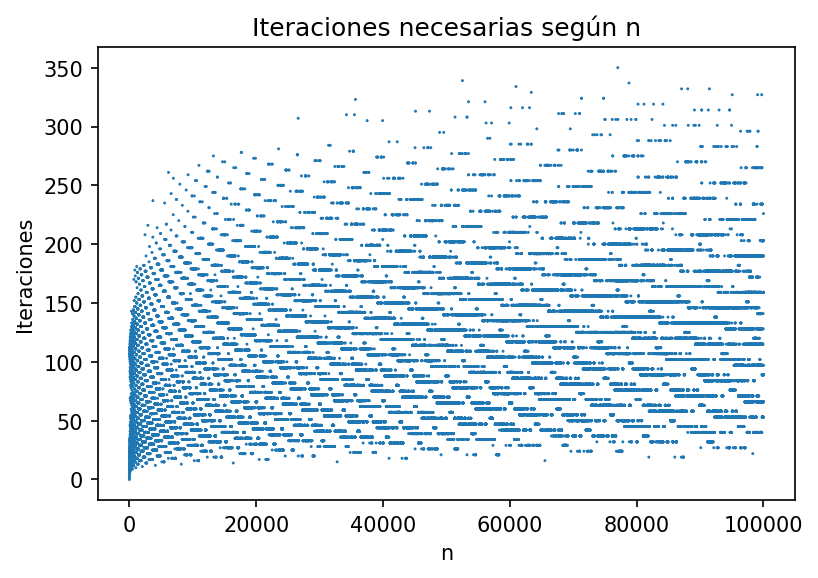

In [145]:
plt.scatter(xlist, ylist,edgecolors='none', s=2)
plt.ylabel('Iteraciones')
plt.xlabel('n')
plt.title('Iteraciones necesarias según n')

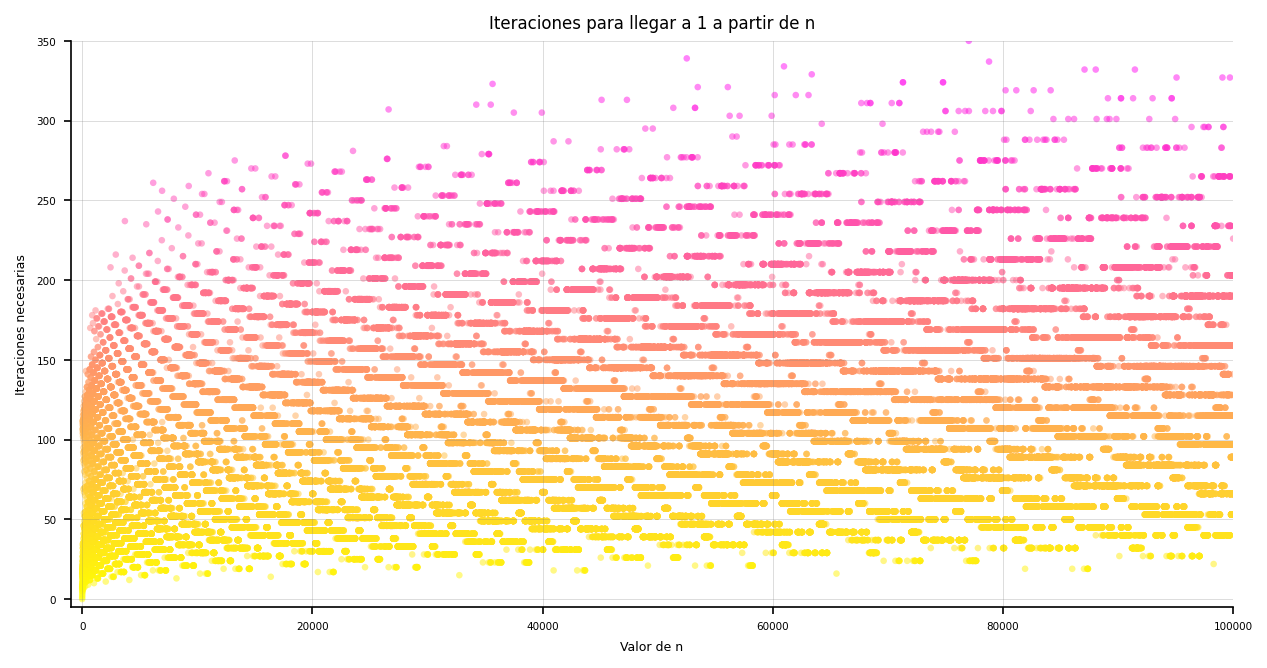

In [152]:
# Aquí nomas estoy jugando con los gráficos

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 5)

ax1.set_xlabel('Valor de n', fontsize=6)
ax1.set_ylabel('Iteraciones necesarias', fontsize=6)
ax1.set_title('Iteraciones para llegar a 1 a partir de n', fontsize=8)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.tick_params(axis='x', labelsize=5)
plt.tick_params(axis='y', labelsize=5)

ax1.set_xlim(-1000, ran)
ax1.set_ylim(-5, max(ylist))

plt.scatter(xlist, ylist,edgecolors='none',c=ylist, s=10, cmap="spring_r", alpha=0.5)


## Ejercicio 2

Encuentra el residuo de $F_{102030405060708090}$ al ser dividido por $9! = 362880$. 
  
  Nota que si se siguen exactamente los mismos pasos vistos en clase potencialmente podrían haber $(9!)^2 = 131681894400$ parejas posibles de residuos, lo que ocuparía mucho tiempo de ejecución en el programa, y computar los primeros $102030405060708090$ residuos también es costoso. 

¿Cómo optimizarlo? Hint: Recuerda el teorema chino del residuo.

---



Notemos que $9! = 2^7 \cdot 3^4 \cdot 5 \cdot 7$. El teorema chino del residuo nos permite rescatar la congruencia módulo $9!$ sabiendo las congruencias módulo $2^7, 3^4, 5$ y $7$ de manera individual. Entonces, el primer paso es escribir un programa que calcule dichas congruencias:

* $F_{102030405060708090} \pmod {2^7}$

* $F_{102030405060708090} \pmod {3^4}$

* $F_{102030405060708090} \pmod 5$

* $F_{102030405060708090} \pmod 7$

In [3]:
# Para encontrar las congruencias vamos a utilizar el periodo de pissano, el cual nos dice que el numero i-esismo de fibonacci (mod M)
# Buscamos obttner la longitud del periodo de pissano para un valor m, sabiendo que el periodo de pissano siempre empieza con  (0, 1, ...)

def lenpisano(m):
    res = [0, 1]
    cur = (1, 1)

    while cur != (1,0):
        res.append(cur[1])
        cur = (cur[1], (cur[0] + cur[1]) % m)

    return(len(res))

In [58]:
# Ahora hagamos una función que obtenga el modulo del número:


def fibonaccimodulo(n, m):
    pisano = lenpisano(m)
    # Obtendremos las congruencias del n-esimo numero de fibonacci y será del numero de fibonacci congruente 
    # del que calcularemos el valor de Fibonacci, pues será mucho más chico que el original.
    n = n % pisano 

    ant, act = 0, 1
    
    for i in range(n-1):
        [ant, act] = [act, ant + act]
    return (act % m)

In [59]:
modules = [2**7, 3**4, 5, 7]
n = 102030405060708090

congruencias = []

for m in modules:
    congruencias.append(fibonaccimodulo(n, m))


In [60]:
congruencias

[120, 73, 0, 6]

Entonces tenemos un sistema de la forma:

$$
\begin{align}
    x &\equiv 120 \pmod{128} \\
    x &\equiv 73 \pmod{81} \\
    x &\equiv 0 \pmod{5} \\
    x &\equiv 6 \pmod{7} 
\end{align}
$$

Recordemos que nos dice el teoremma chino del residuo:

---



**Teorema Chino del Residuo**: Sean $a_{i} \in \mathbb{Z}$ y $n_{i} \in \mathbb{N}$ tales que $\left(n_{r}, n_{j}\right)=1$, con $r \neq j$ e $i=1,2, \ldots, k .$. Entonces el sistema
$$
\begin{aligned}
&x \equiv a_{1}\left(\bmod n_{1}\right) \\
&x \equiv a_{2}\left(\bmod n_{2}\right) \\
&x \equiv a_{3}\left(\bmod n_{3}\right) \\
&\vdots \\
&x \equiv a_{k}\left(\bmod n_{k}\right)
\end{aligned}
$$
tiene solución única módulo $N=n_{1} \cdot n_{2} \cdot \ldots \cdot n_{k}$. Adicionalmente, la solución está dada por
$$
x \equiv a_{1} \cdot c_{1} \cdot d_{1}+a_{2} \cdot c_{2} \cdot d_{2}+\ldots+a_{k} \cdot c_{k} \cdot d_{k}(\bmod N)
$$
donde $c_{i}$ verifica
$$
c_{i}=\frac{N}{n_{i}},
$$
y $d_{i}$ es tal que
$$
c_{i} \cdot d_{i} \equiv 1\left(\bmod n_{i}\right)
$$
para todo $1 \leq i \leq k .$

*Fuente: http://www.matematicas.ciencias.uchile.cl/juaco/section-17.html*

---
Para obtener el valor de $d_i$ vamos a tener que recordar algunas propiedades. Primero notemos que $128$, $81$, $5$ y $7$ son primos relativos entre si, entonces, su maximo común divisor es 1. Y sabemos además que el maximo común divisor de dos nummeros puede ser repreesentado por una combinación lineal de sus valores.

Construyamos una función que apartir de dos números podamos contruir una combinación lineal de su mcd

Este proceso se llama Algoritmo de Euclides. Y dice que dados dos numeros a y b, con a > b. $mcd(a, b) = ax + by$, donde $x$ e $y$ son numeros enteros.

El algoritmo nos indica: 

1. Si $b=0$ entonces $\operatorname{mcd}(a, b)=a$ y el algoritmo termina
2. En otro caso, $\operatorname{mcd}(a, b)=\operatorname{mcd}(b, r)$ donde $r$ es el resto de dividir $a$ entre $b$. Para calcular $\operatorname{mcd}(b, r)$ se utilizan estas mismas reglas
Asuma que llamamos $a=r_{0}$ y $b=r_{1}$. Aplicando estas reglas se obtiene la siguiente secuencia de operaciones:

| Paso | Operación | Significado |
| :--- | :--- | :--- |
| 1 | $r_0$ dividido entre $r_1$ es $q_1$ y sobran $r_2$ | $mcd(r_0,r_1)$=$mcd(r_1,r_2)$ |
| 2 | $r_1$ dividido entre $r_2$ es $q_2$ y sobran $r_3$ | $mcd(r_1,r_2)$=$mcd(r_2,r_3)$ |
| 3 | $r_2$ dividido entre $r_3$ es $q_3$ y sobran $r_4$ | $mcd(r_2,r_3)$=$mcd(r_3,r_4)$ |
| $\vdots$ | $\vdots$ | $\vdots$ |
| n | $r_{n-1}$ dividido entre $r_n$ es $q_n$ y sobran $r_{n+1}$ | mcd($r_{n-1}$,$r_n$)=mcd($r_n$,r_(n+1)) |
| n+1 | $r_n$ dividido entre $r_{n+1}$ es $q_{n+1}$ y sobra | $mcd(r_n,r_{n+1})$=$mcd(r_{n+1},0)$ |

*Fuente: https://es.wikipedia.org/wiki/Algoritmo_de_Euclides*



Así el algoritmo de euclides nos dice que:

$$
\operatorname{mcd}(a, b)=\operatorname{mcd}(b, r)
$$
Con $r$ el residuo. 

Esto a su vez implica que existen $\alpha(b, r)$ y $\beta(b, r)$ tales que:
$$
\alpha(b, r) b+\beta(b, r) r=\operatorname{mcd}(b, r)
$$

Sabemos que $r = a \operatorname{mod}(b)$, entonces $r = a -bq$, donde q es la división entera. Sustituyendo en la ecuación anterior:

$$
\alpha(b, r) b+\beta(b, r)[a-b q]=\operatorname{mcd}(b, r)
$$
Desarrollando:

$$
\beta(b, r) a+(\alpha(b, r)-\beta(b, r) q) b=\operatorname{mcd}(b, r) = \operatorname{mcd}(a, b)
$$

El algoritmo de euclides nos dice también:
$$
\alpha(a, b) a+\beta(a, b) b=\operatorname{mcd}(a, b)
$$

Por lo que podemos ddefinir a las funciones como:

$$
\alpha(a, b)=\beta(b, r), \quad \beta(a, b)=\alpha(b, r)-\beta(b, r) q
$$

Para poder inicializar los valores de $\beta$ y $\alpha$, podemos irnos al último valor del algoritmo de Euclides, donde $r=0$, entonces buscamos una combinación lineal tal que:

$$\alpha(a, 0) a+\beta(a, 0) 0=\operatorname{mcd}(a, 0)=a$$

Una manera de lograrlo es definiendo
$$
\begin{aligned}
&\alpha(a, 0)=1 \\
&\beta(a, 0)=0
\end{aligned}
$$

In [84]:
def ecl(a,b):
    if b>a:
        return ecl(b,a)
    if b ==0: # Caso base
        alfa =1
        beta =0
        mcd =a
    else :
        q = a//b
        r = a%b
        #Recursión hasta que r llegue a 0 
        alfa_b_r , beta_b_r = ecl (b,r)
        
        #Definimos las funciones 
        alfa = beta_b_r
        beta = alfa_b_r - beta_b_r * q
    return [alfa , beta] 

Hecho este código, ya solo queda aplicar el terema chino del ressiduo:

In [77]:
# Obtencion de las c_i haciendola pareja con n_i: (n_i, c_i)

C = []
for i in modules:
    C.append([362880 // i, i])
C

[[2835, 128], [4480, 81], [72576, 5], [51840, 7]]

In [90]:
# Sabemos que todos son primos relativos entonces mcd = 1
# Obtengamos las d_i

D=[]
for i in C:
    D.append(ecl(i[0], i[1]))

In [91]:
D

[[27, -598], [13, -719], [1, -14515], [3, -22217]]

In [117]:
# Obtención de X

x = 0

for i in range(4):
    x += congruencias[i]*C[i][0]*D[i][0]
x

14370040

In [118]:
# Así el x que cumple el sistema de congruencias es: 933120 mod(9!)

x % 362880 

217720

## Ejercicio 3

Muestra que al considerar la sucesión de Fibonacci módulo $n$, la sucesión obtenida se cicla desde el principio.

Partamos del hecho de que la sucesión de Fibonacci módulo n, dado que el termino F_a de la sucesión depende de los dos terminos anteriores, podemos ver a la sucesión como parejas ordenadas de posibles valores $(F_{a-1}, F_{a-2})$, estos posibles valores estarán sujetos al módulo, pues el máximo valor que puede tomar el residuo es: $n-1$. Esto quiere decir que la sucesión de Fibonacci módulo n estará sujeta a un conjunto finito de dimensión $n^2$.

Hagamos $C$ al conjunto de todas las posibles parejas de resultados de la sucesión de Fibonacci módulo $n$, siendo así $C$ un conjunto finito. Y ahora pensemos en la sucesión de Fibonacci como una función $f(x, y) = (x+y, x)$, $f: C \rightarrow C$. 

Si tomamos una pareja ordenada de valores posibles de la sucesión modulo $n$, es decir un elemnto de $C$, y lo evaluamos en $f$, esta nos regresará un valor que tambien pertenece a $C$, y si a ese nuevo valor le volvemos a aplicar $f$, de nuevo nos regresará un valor en $C$, es decir que si componemos $f$ consigo misma, dado que $C$ es finito, en algun momento habremos de haber obtenido todos los valores de $C$ (posibles). Y si seguimos componinedo con $f$, tendremos que repetir valores y la sucesión se volverá periodica. Esto debido al principio del palomar, que nos dice que si tenemos n lugares, y m resultados, donde m>n, entonces hay en un mismo lugar dos o más resultados.

Hemos visto, que en efecto $f$ es periodica, nos resta ver que es completamente periodica, y por lo tanto se cicla desde el principio. Esto es equivalente a pedir que $f$ sea biyectiva, pues en ese caso, si cada elemento del codominio es correspondido por exactamente un elemento del dominio al 'ocupar' todos los 'luagres' solo le resta repetir la misma secuencia. Para ello veamos que sea sobreyectiva, e inyectiva.

La inyectividad se da, debido a que $f: C \rightarrow C$, es decir son de la misma dimensión, y de acuerdo a la definción de inyectividad, a cada elemento del codominio es aplicado por a lo sumo un elemento del dominio, entonces en este caso todo el dominio es cubierto tambien, lo cual implica automaticamente por definición sobreyectividad, pues la sobreyectividad nos dice que cada elemento del codominio le es aplicado por al menos un elemento del dominio. Y por lo tanto tambien es biyectiva. Y por lo tanto es periodica, y se cicla desde el principio.

Referencias: https://sci-hub.se/10.2307/2309169